In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cicddos2019/Syn-training.parquet
/kaggle/input/cicddos2019/UDPLag-testing.parquet
/kaggle/input/cicddos2019/NetBIOS-testing.parquet
/kaggle/input/cicddos2019/Portmap-training.parquet
/kaggle/input/cicddos2019/Syn-testing.parquet
/kaggle/input/cicddos2019/MSSQL-testing.parquet
/kaggle/input/cicddos2019/SNMP-testing.parquet
/kaggle/input/cicddos2019/UDPLag-training.parquet
/kaggle/input/cicddos2019/NTP-testing.parquet
/kaggle/input/cicddos2019/LDAP-testing.parquet
/kaggle/input/cicddos2019/UDP-training.parquet
/kaggle/input/cicddos2019/NetBIOS-training.parquet
/kaggle/input/cicddos2019/DNS-testing.parquet
/kaggle/input/cicddos2019/UDP-testing.parquet
/kaggle/input/cicddos2019/LDAP-training.parquet
/kaggle/input/cicddos2019/TFTP-testing.parquet
/kaggle/input/cicddos2019/MSSQL-training.parquet


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dhoogla/cicddos2019")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cicddos2019


In [3]:
dfps_tr = []
dfps_ts = []
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith('-training.parquet'):
            dfp = os.path.join(dirname, filename)
            dfps_tr.append(dfp)
            print(dfp)
        elif filename.endswith('-testing.parquet'):
            dfp = os.path.join(dirname, filename)
            dfps_ts.append(dfp)
            print(dfp)

/kaggle/input/cicddos2019/Syn-training.parquet
/kaggle/input/cicddos2019/UDPLag-testing.parquet
/kaggle/input/cicddos2019/NetBIOS-testing.parquet
/kaggle/input/cicddos2019/Portmap-training.parquet
/kaggle/input/cicddos2019/Syn-testing.parquet
/kaggle/input/cicddos2019/MSSQL-testing.parquet
/kaggle/input/cicddos2019/SNMP-testing.parquet
/kaggle/input/cicddos2019/UDPLag-training.parquet
/kaggle/input/cicddos2019/NTP-testing.parquet
/kaggle/input/cicddos2019/LDAP-testing.parquet
/kaggle/input/cicddos2019/UDP-training.parquet
/kaggle/input/cicddos2019/NetBIOS-training.parquet
/kaggle/input/cicddos2019/DNS-testing.parquet
/kaggle/input/cicddos2019/UDP-testing.parquet
/kaggle/input/cicddos2019/LDAP-training.parquet
/kaggle/input/cicddos2019/TFTP-testing.parquet
/kaggle/input/cicddos2019/MSSQL-training.parquet


In [4]:
train_prefixes = [dfp.split('/')[-1].split('-')[0] for dfp in dfps_tr]
test_prefixes = [dfp.split('/')[-1].split('-')[0] for dfp in dfps_ts]

print(train_prefixes)
print(test_prefixes)

common_prefixes = list(set(train_prefixes).intersection(test_prefixes))
print(common_prefixes)

dfps_train = [dfp for dfp in dfps_tr if dfp.split('/')[-1].split('-')[0] in common_prefixes]
dfps_test = [dfp for dfp in dfps_ts if dfp.split('/')[-1].split('-')[0] in common_prefixes]

['Syn', 'Portmap', 'UDPLag', 'UDP', 'NetBIOS', 'LDAP', 'MSSQL']
['UDPLag', 'NetBIOS', 'Syn', 'MSSQL', 'SNMP', 'NTP', 'LDAP', 'DNS', 'UDP', 'TFTP']
['MSSQL', 'LDAP', 'NetBIOS', 'UDP', 'UDPLag', 'Syn']


In [5]:
train_df = pd.concat([pd.read_parquet(dfp) for dfp in dfps_tr], ignore_index=True)
test_df = pd.concat([pd.read_parquet(dfp) for dfp in dfps_ts], ignore_index=True)

In [6]:
train_df.shape, test_df.shape

((125170, 78), (306201, 78))

In [7]:
train_df.head()

train_df.info()

train_df.describe()

train_df["Label"].value_counts()

# Ver se tem valores nulos (não deve ter, mas é bom confirmar)
train_df.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125170 entries, 0 to 125169
Data columns (total 78 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Protocol                  125170 non-null  int8   
 1   Flow Duration             125170 non-null  int32  
 2   Total Fwd Packets         125170 non-null  int32  
 3   Total Backward Packets    125170 non-null  int16  
 4   Fwd Packets Length Total  125170 non-null  float32
 5   Bwd Packets Length Total  125170 non-null  float32
 6   Fwd Packet Length Max     125170 non-null  float32
 7   Fwd Packet Length Min     125170 non-null  float32
 8   Fwd Packet Length Mean    125170 non-null  float32
 9   Fwd Packet Length Std     125170 non-null  float32
 10  Bwd Packet Length Max     125170 non-null  float32
 11  Bwd Packet Length Min     125170 non-null  float32
 12  Bwd Packet Length Mean    125170 non-null  float32
 13  Bwd Packet Length Std     125170 non-null  f

0

         Label      Ratio
Label                    
Syn      48840  39.018934
Benign   46427  37.091156
UDP      18090  14.452345
MSSQL     8523   6.809140
LDAP      1906   1.522729
Portmap    685   0.547256
NetBIOS    644   0.514500
UDPLag      55   0.043940




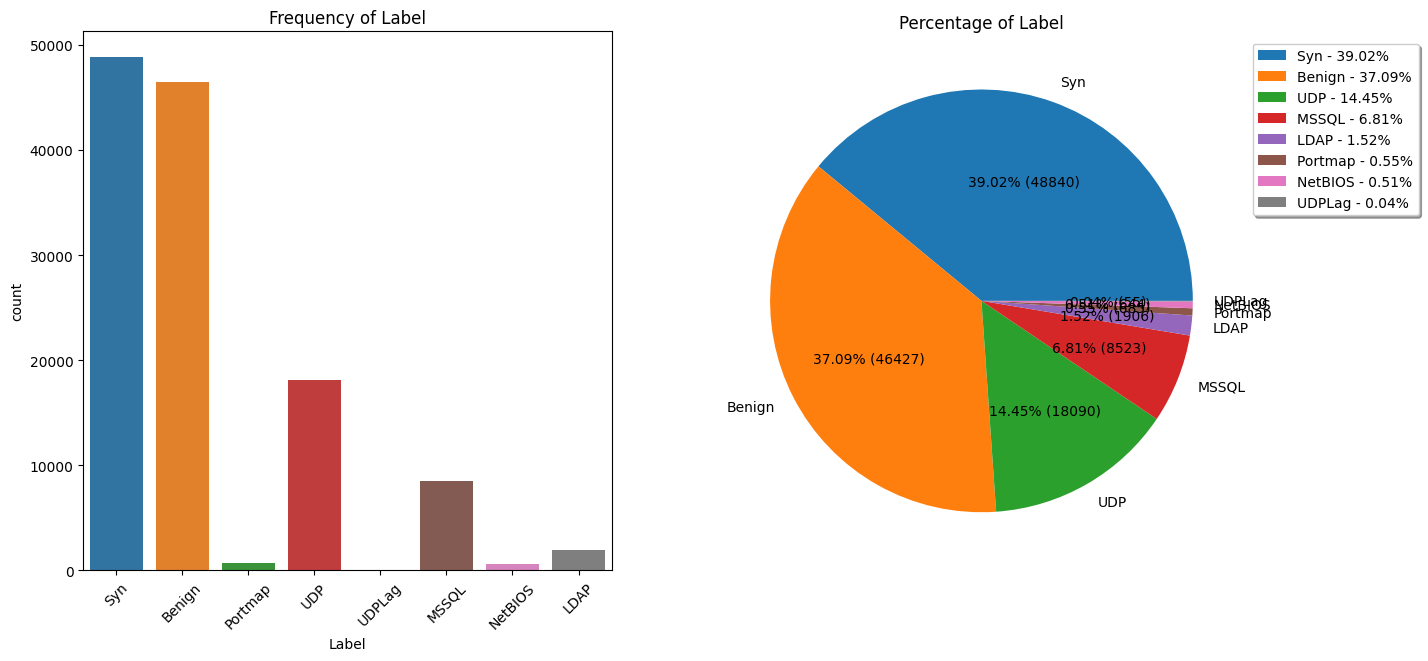

In [8]:
def cat_summary(data, col, plot=False):
    print(pd.DataFrame({col: data[col].value_counts(), "Ratio": data[col].value_counts() / len(data) * 100}))
    print("\n")

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(15, 7))
        plt.subplot(1, 2, 1)
        sns.countplot(x=col, data = data)
        plt.xticks(rotation=45)
        plt.title(f"Frequency of {col}")

        plt.subplot(1, 2, 2)
        values = data[col].value_counts()
        plt.pie(x=values, labels=values.index, autopct= lambda x: "{:.2f}% ({:.0f})".format(x, x/100 * sum(values)))
        plt.legend(labels = ['{} - {:.2f}%'.format(index, value / sum(values) * 100) for index, value in zip(values.index, values)],
                   loc = "upper left",
                   bbox_to_anchor = (1, 1),
                   fancybox = True,
                   shadow = True,
                   ncol=1)
        plt.title(f"Percentage of {col}")
        plt.show(block=True)
cat_summary(train_df, "Label", True)

In [9]:
def grab_col_names(data, cat_th=10, car_th=20):

    cat_cols = [col for col in data.columns if data[col].dtypes == "O"]
    num_but_cat = [col for col in data.columns if data[col].nunique() < cat_th and data[col].dtypes != "O"]
    high_card_cat_cols = [col for col in data.columns if data[col].nunique() > car_th and data[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in high_card_cat_cols]

    num_cols = [col for col in data.columns if data[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {data.shape[0]}")
    print(f"Variables: {data.shape[1]}")
    print(f"Categorical Columns: {len(cat_cols)}")
    print(f"Numerical Columns: {len(num_cols)}")
    print(f"High Cardinality Categorical Columns: {len(high_card_cat_cols)}")
    print(f"Number but Categorical Columns: {len(num_but_cat)}")
    print("\n")

    return cat_cols, num_cols, high_card_cat_cols

cat_cols, num_cols, high_card_cat_cols = grab_col_names(train_df)
print(f"Catergorical Columns: {cat_cols}")
print(f"Numerical Columns: {num_cols}")
print(f"High Cardinality Categorical Columns: {high_card_cat_cols}")

Observations: 125170
Variables: 78
Categorical Columns: 20
Numerical Columns: 58
High Cardinality Categorical Columns: 0
Number but Categorical Columns: 19


Catergorical Columns: ['Label', 'Protocol', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
Numerical Columns: ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packets Length Total', 'Bwd Packets Length Total', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT To

In [10]:
for i in cat_cols:
    print(i, train_df[i].unique())

Label ['Syn' 'Benign' 'Portmap' 'UDP' 'UDPLag' 'MSSQL' 'NetBIOS' 'LDAP']
Protocol [ 6 17  0]
Fwd PSH Flags [0 1]
Bwd PSH Flags [0]
Fwd URG Flags [0]
Bwd URG Flags [0]
FIN Flag Count [0]
SYN Flag Count [0 1]
RST Flag Count [0 1]
PSH Flag Count [0]
ACK Flag Count [1 0]
URG Flag Count [0 1]
CWE Flag Count [0 1]
ECE Flag Count [0]
Fwd Avg Bytes/Bulk [0]
Fwd Avg Packets/Bulk [0]
Fwd Avg Bulk Rate [0]
Bwd Avg Bytes/Bulk [0]
Bwd Avg Packets/Bulk [0]
Bwd Avg Bulk Rate [0]


In [11]:
print(f"Number of Duplicate Rows: {train_df.duplicated().sum()}")
print("Tamanho total:", len(train_df))
duplicates = train_df.duplicated().sum()
print("Linhas duplicadas:", duplicates)
print("Proporção duplicada:", duplicates / len(train_df) * 100, "%")

Number of Duplicate Rows: 3494
Tamanho total: 125170
Linhas duplicadas: 3494
Proporção duplicada: 2.7914036909802666 %


In [12]:
train_df = train_df.drop_duplicates()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

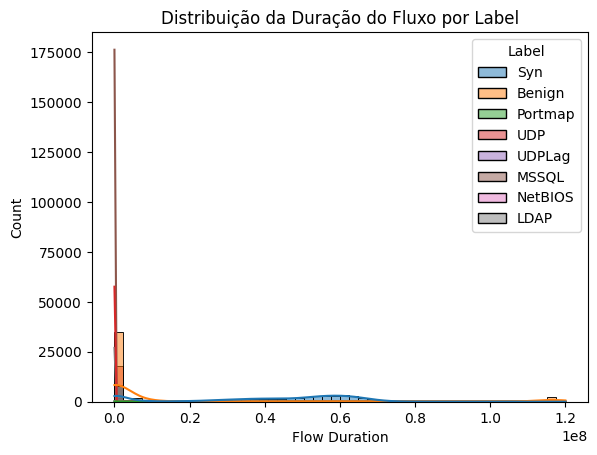

In [13]:
sns.histplot(data=train_df, x="Flow Duration", hue="Label", bins=50, kde=True)
plt.title("Distribuição da Duração do Fluxo por Label")
plt.show()

In [14]:
single_val_cols = [col for col in train_df.columns if train_df[col].nunique() == 1]
single_val_cols

['Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'FIN Flag Count',
 'PSH Flag Count',
 'ECE Flag Count',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

In [15]:
train_df.drop(single_val_cols, axis=1, inplace = True)

In [16]:
train_df.shape

(121676, 66)

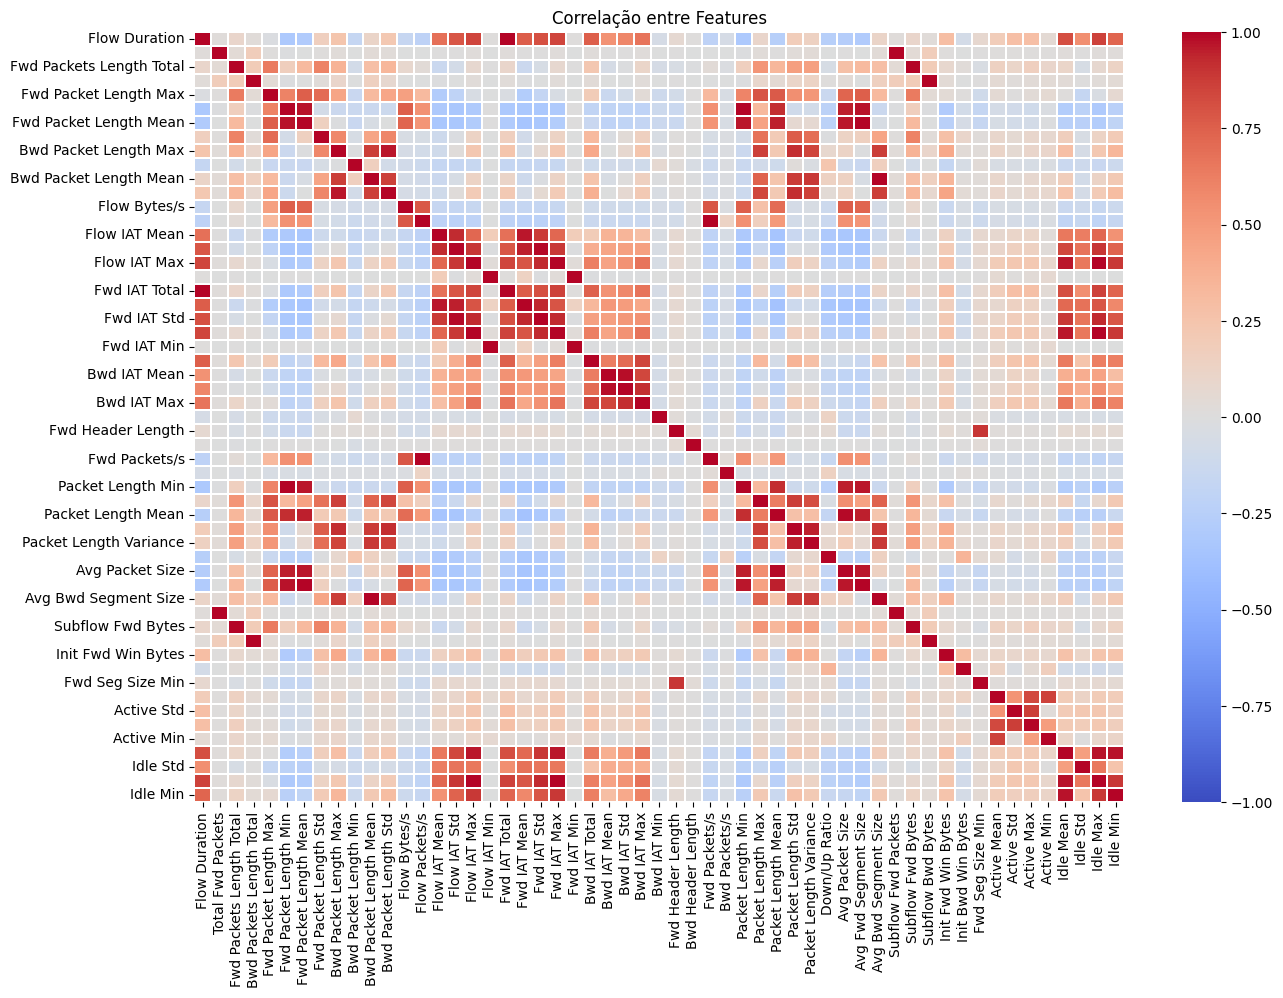

In [17]:
corr = train_df.select_dtypes(include=["float32", "float64", "int32", "int64"]).corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap="coolwarm", vmax=1.0, vmin=-1.0, linewidths=0.1)
plt.title("Correlação entre Features")
plt.show()


In [18]:
df_encoded = train_df.copy()
df_encoded["Label"] = df_encoded["Label"].apply(lambda x: 1 if x != "Benign" else 0)

corr_with_target = df_encoded.corr()["Label"].sort_values(ascending=False)
print(corr_with_target.head(10))

Label                    1.000000
Fwd IAT Mean             0.389039
Flow IAT Mean            0.378793
ACK Flag Count           0.375768
Packet Length Min        0.330486
Fwd Packet Length Min    0.324453
Flow IAT Std             0.308256
Idle Std                 0.290344
Fwd IAT Std              0.281989
Avg Fwd Segment Size     0.266148
Name: Label, dtype: float64


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Detecta os tipos com base na sua função
cat_cols, num_cols, high_card_cat_cols = grab_col_names(train_df)
single_val_cols = [col for col in train_df.columns if train_df[col].nunique() == 1]
print(num_cols)

# Refinar numéricas contínuas (tirando as discretas com poucos valores únicos)
cont_features = [col for col in num_cols if train_df[col].nunique() > 20 and col not in single_val_cols]

# Dropdowns
feature_dropdown = widgets.Dropdown(
    options=cat_cols + num_cols,
    description='Feature:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

def smart_plot(feature):
    plt.figure(figsize=(8, 4))

    if feature in single_val_cols:
        print(f"⚠️ A feature '{feature}' tem valor único — não será plotada.")
        return

    if feature in cat_cols:
        # Gráfico de frequência para categóricas
        sns.countplot(data=train_df, x=feature, hue="Label")
        plt.title(f"Frequência de {feature} por Label")
    elif feature in num_cols:
        # Boxplot para outras numéricas
        sns.boxplot(data=train_df, x="Label", y=feature)
        plt.title(f"Boxplot de {feature} por Label")

    plt.tight_layout()
    plt.show()

# Interatividade
widgets.interact(smart_plot, feature=feature_dropdown);




Observations: 121676
Variables: 66
Categorical Columns: 8
Numerical Columns: 58
High Cardinality Categorical Columns: 0
Number but Categorical Columns: 7


['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packets Length Total', 'Bwd Packets Length Total', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'Down/Up Ratio', 'Avg Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Si

interactive(children=(Dropdown(description='Feature:', layout=Layout(width='50%'), options=('Label', 'Protocol…

In [20]:
numerical_df = train_df.select_dtypes(include=[np.number])

corr_matrix = numerical_df.corr().abs()

mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)

upper_triangle = corr_matrix.where(mask)

high_corr_cols = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.8)]

print(f"Total number of highly correlated columns: {len(high_corr_cols)}")
print("Highly correlated columns are:", high_corr_cols)

Total number of highly correlated columns: 34
Highly correlated columns are: ['Bwd Packets Length Total', 'Fwd Packet Length Mean', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Std', 'Bwd IAT Max', 'Fwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'RST Flag Count', 'Avg Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Fwd Act Data Packets', 'Fwd Seg Size Min', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Max', 'Idle Min']


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [21]:
train_df.drop(high_corr_cols, axis=1, inplace=True)
train_df.shape

(121676, 32)

In [22]:
# Tudo que não for benigno vira ataque
train_df["Label"] = train_df["Label"].apply(lambda x: "Benign" if x == "Benign" else "Attack")

# Encode binário
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df["Label"] = le.fit_transform(train_df["Label"])

# Confirma mapeamento
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'Attack': 0, 'Benign': 1}


       Label      Ratio
Label                  
0      76575  62.933528
1      45101  37.066472




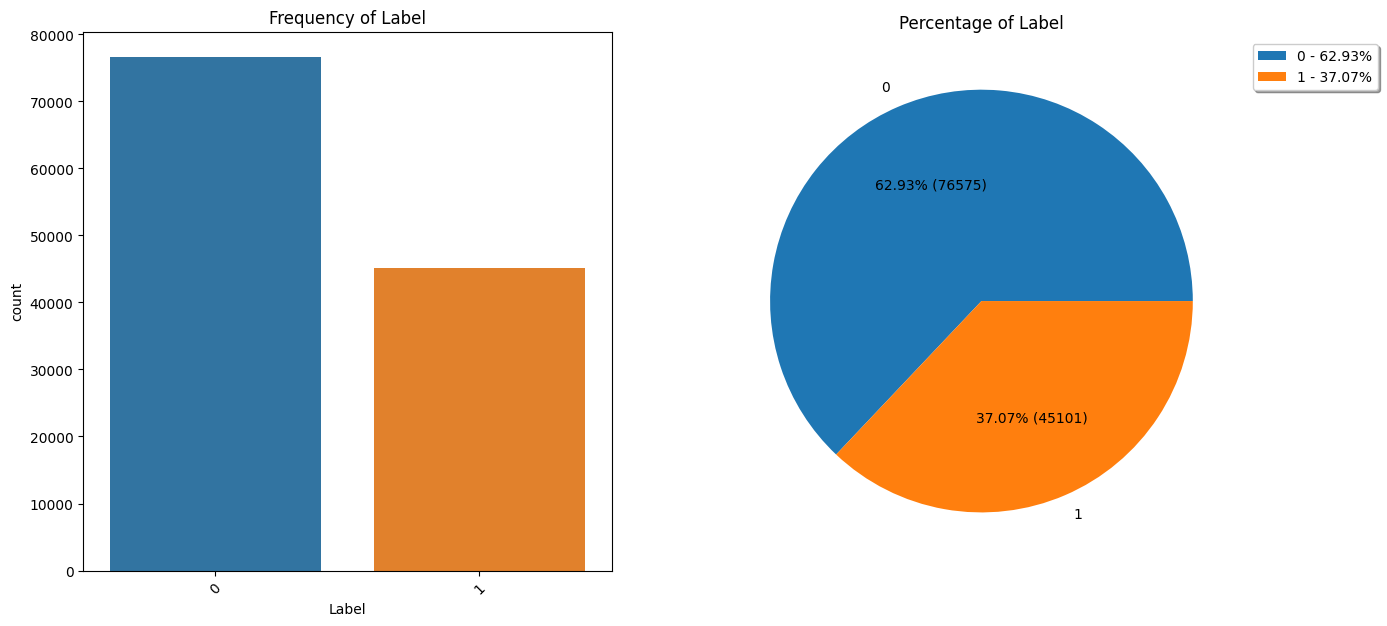

In [23]:
cat_summary(train_df, "Label", True)

Acabei não usando essa parte de undersampling, foi só um teste

Proporção antes do balanceamento:
Label
0    0.629335
1    0.370665
Name: proportion, dtype: float64

Proporção após undersampling:
Label
1    0.5
0    0.5
Name: proportion, dtype: float64
       Label  Ratio
Label              
1      45101   50.0
0      45101   50.0




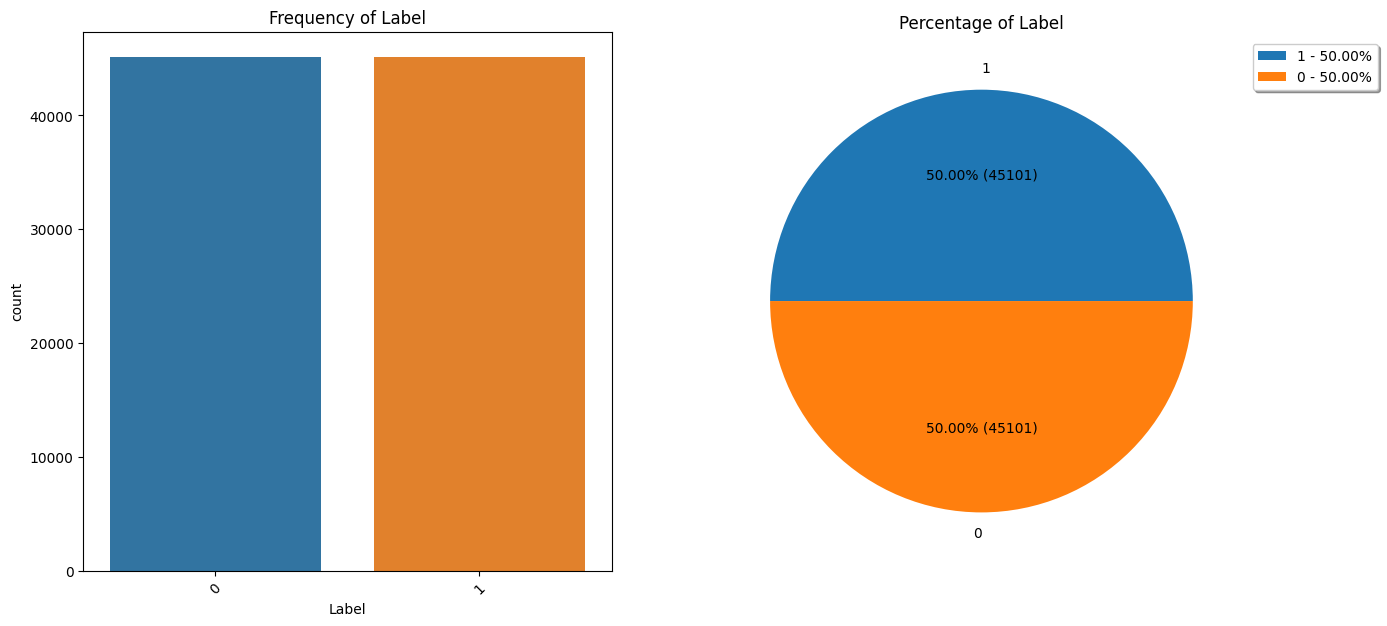

In [24]:
# Confirmar proporção atual
print("Proporção antes do balanceamento:")
print(train_df['Label'].value_counts(normalize=True))

# Undersampling
malicious = train_df[train_df['Label'] == 0]
benign = train_df[train_df['Label'] == 1]
min_size = min(len(benign), len(malicious))
balanced_df = pd.concat([benign.sample(min_size, random_state=42), malicious.sample(min_size, random_state=42)])

# Verificar nova proporção
print("\nProporção após undersampling:")
print(balanced_df['Label'].value_counts(normalize=True))
cat_summary(balanced_df, "Label", True)

Divisão de dados

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
X = train_df.drop(columns=['Label'])
y = train_df['Label']

# Divisão(70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Tamanho treino:", len(X_train))
print("Tamanho teste:", len(X_test))

Tamanho treino: 85173
Tamanho teste: 36503


Baseline: Criação de Modelos Iniciais

In [26]:
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42),
    'C4.5': DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, random_state=42)
}

In [27]:
results = {}
for name, model in models.items():
    print(f"\nTreinando {name} (Baseline)...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_pred)
    results[name] = {'F1-Score': report['weighted avg']['f1-score'], 'AUC': auc}
    print(f"{name} - Relatório:\n", classification_report(y_test, y_pred))

# Comparar baselines
results_df = pd.DataFrame(results).T
print("\nComparação de Baselines:")
print(results_df)


Treinando Decision Tree (Baseline)...
Decision Tree - Relatório:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22973
           1       1.00      1.00      1.00     13530

    accuracy                           1.00     36503
   macro avg       1.00      1.00      1.00     36503
weighted avg       1.00      1.00      1.00     36503


Treinando C4.5 (Baseline)...
C4.5 - Relatório:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22973
           1       1.00      1.00      1.00     13530

    accuracy                           1.00     36503
   macro avg       1.00      1.00      1.00     36503
weighted avg       1.00      1.00      1.00     36503


Treinando Random Forest (Baseline)...
Random Forest - Relatório:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22973
           1       1.00      1.00      1.00     13530



⚙️ Treinando Decision Tree...

⚙️ Treinando C4.5...

⚙️ Treinando Random Forest...

⚙️ Treinando XGBoost...


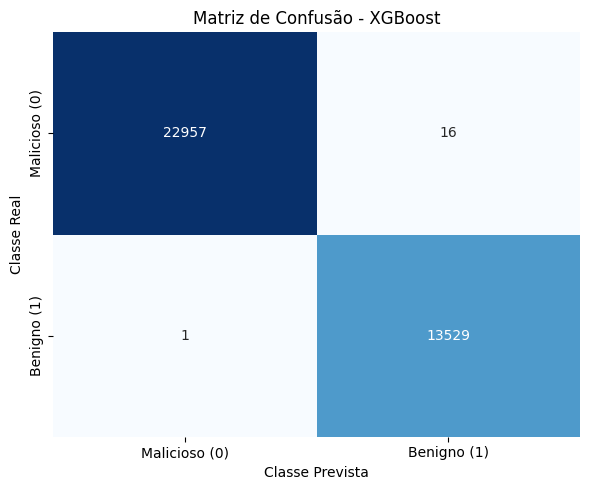


⚙️ Treinando MLP...


In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import time

results = {}

for name, model in models.items():
    print(f"\n⚙️ Treinando {name}...")
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    # Fazer previsões no conjunto de teste
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Gerar a matriz de confusão apenas para o XGBoost
    if name == "XGBoost":
        cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                    xticklabels=["Malicioso (0)", "Benigno (1)"],
                    yticklabels=["Malicioso (0)", "Benigno (1)"],
                    cbar=False)
        plt.title("Matriz de Confusão - XGBoost")
        plt.xlabel("Classe Prevista")
        plt.ylabel("Classe Real")
        plt.tight_layout()
        save_dir = 'figuras'
        filename = f"{save_dir}/confusion_xgb.png"
        os.makedirs(save_dir, exist_ok=True)
        plt.savefig(filename)
        plt.show()

    # Calcular métricas
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score'],
        'AUC': roc_auc_score(y_test, y_probs) if y_probs is not None else None,
        'Tempo (s)': round(end - start, 2)
    }


In [29]:
results_df = pd.DataFrame(results).T.round(6)
results_df = results_df.sort_values(by="F1-Score", ascending=False)

print("\n📊 Comparação Completa dos Modelos (Holdout):")
display(results_df.style.background_gradient(cmap='Blues'))



📊 Comparação Completa dos Modelos (Holdout):


,Accuracy,Precision,Recall,F1-Score,AUC,Tempo (s)
Random Forest,0.999534,0.999535,0.999534,0.999534,0.999973,11.800000
XGBoost,0.999534,0.999535,0.999534,0.999534,0.999996,0.840000
C4.5,0.999315,0.999316,0.999315,0.999315,0.999522,0.800000
Decision Tree,0.998658,0.998658,0.998658,0.998658,0.999489,0.990000
MLP,0.836890,0.869639,0.836890,0.823403,0.844318,54.390000


In [30]:
# 2. Validação Cruzada (k=5)
print("\nValidação Cruzada (k=5):")
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='f1_weighted', n_jobs=-1)
    cv_results[name] = {'Mean F1': scores.mean(), 'Std F1': scores.std()}
    print(f"{name} - F1 Médio: {scores.mean():.4f} ± {scores.std():.4f}")

cv_df = pd.DataFrame(cv_results).T
print("\nResultados Validação Cruzada:")
print(cv_df)


Validação Cruzada (k=5):
Decision Tree - F1 Médio: 0.9980 ± 0.0015
C4.5 - F1 Médio: 0.9985 ± 0.0010
Random Forest - F1 Médio: 0.9990 ± 0.0008
XGBoost - F1 Médio: 0.9993 ± 0.0006
MLP - F1 Médio: 0.8727 ± 0.1042

Resultados Validação Cruzada:
                Mean F1    Std F1
Decision Tree  0.998043  0.001509
C4.5           0.998537  0.000989
Random Forest  0.998973  0.000751
XGBoost        0.999269  0.000584
MLP            0.872684  0.104173


In [31]:
import os

def plot_learning_curve(model, name, X, y, save_dir="figuras"):
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np

    # Garante que o diretório de salvamento existe
    os.makedirs(save_dir, exist_ok=True)

    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='f1_weighted', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label='Treino')
    plt.plot(train_sizes, test_mean, label='Validação')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    plt.title(f'Curva de Aprendizado - {name}')
    plt.xlabel('Tamanho do Treino')
    plt.ylabel('F1-Score')
    plt.legend()
    plt.grid()

    # Salvar figura
    filename = f"{save_dir}/curve_{name.lower().replace(' ', '_')}.png"
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()
    print(f"📈 Curva de aprendizado salva em: {filename}")


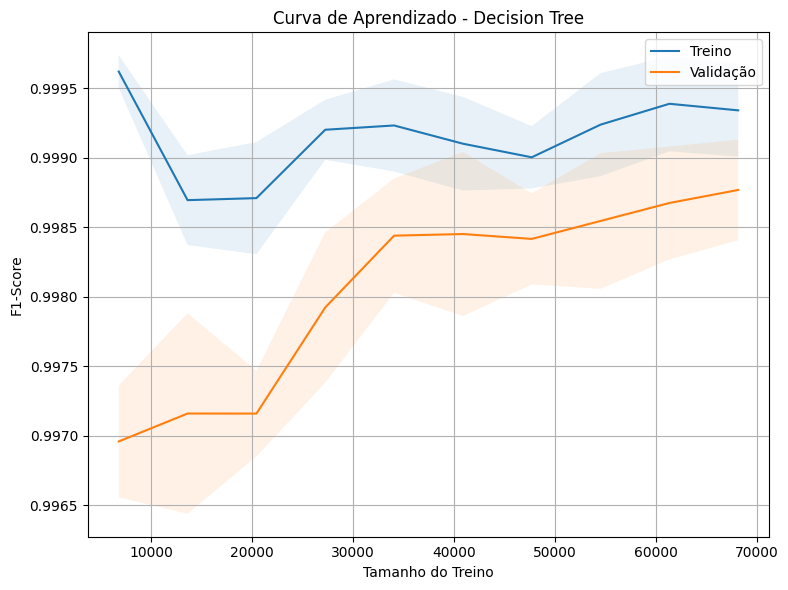

📈 Curva de aprendizado salva em: figuras/curve_decision_tree.png


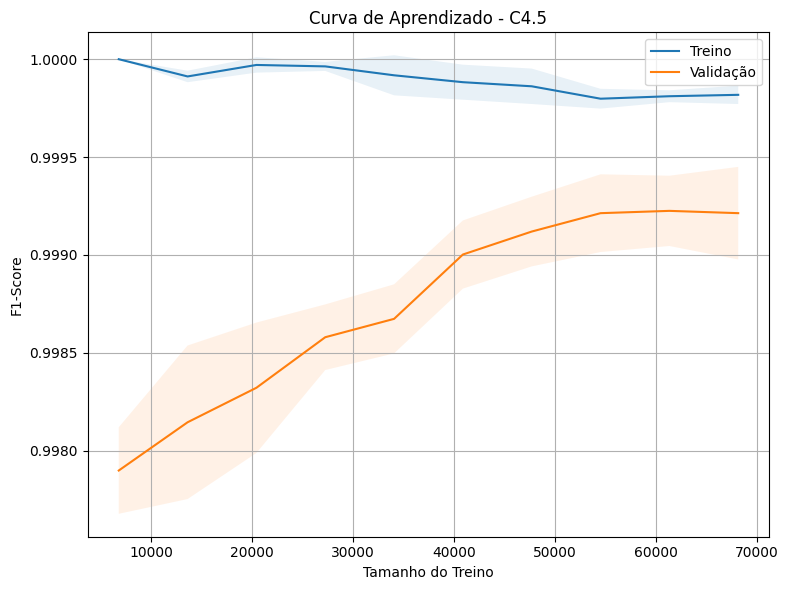

📈 Curva de aprendizado salva em: figuras/curve_c4.5.png


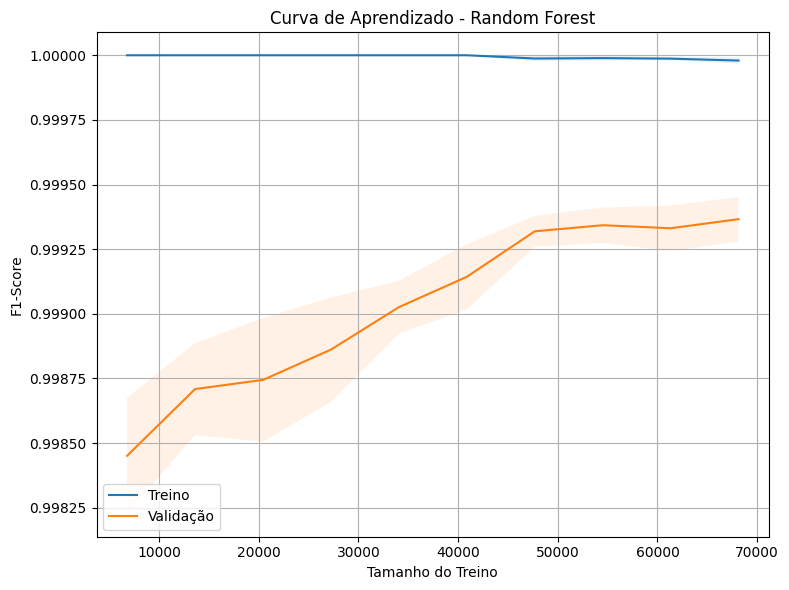

📈 Curva de aprendizado salva em: figuras/curve_random_forest.png


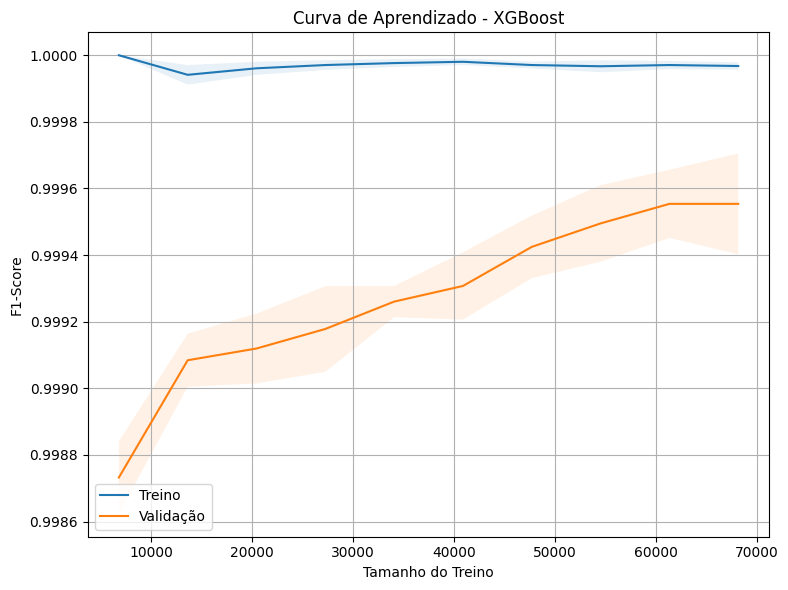

📈 Curva de aprendizado salva em: figuras/curve_xgboost.png


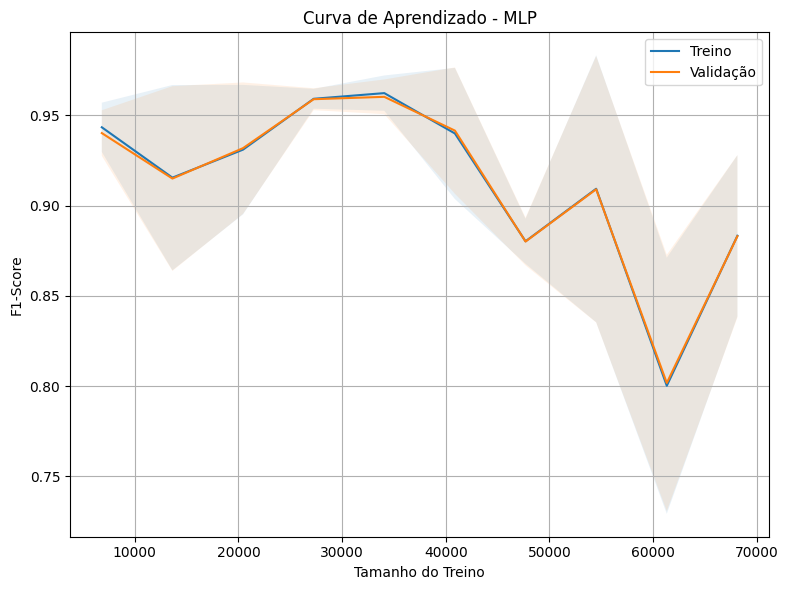

📈 Curva de aprendizado salva em: figuras/curve_mlp.png


In [32]:
for name in models:
    plot_learning_curve(models[name], name, X_train, y_train)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_residuals_comparativo(models, X_test, y_test):
    """
    Plota histogramas dos erros residuais para múltiplos modelos em subplots lado a lado.
    """
    n = len(models)
    fig, axes = plt.subplots(1, n, figsize=(5 * n, 5), sharey=True)

    for ax, (name, model) in zip(axes, models.items()):
        y_pred = model.predict(X_test)
        residuals = y_test - y_pred  # 0 = correto, ±1 = erro
        sns.histplot(residuals, bins=3, discrete=True, ax=ax)
        ax.set_title(f'{name}')
        ax.set_xlabel('Erro (0 = Correto, ±1 = Incorreto)')
        ax.set_ylabel('Frequência')
        ax.grid()

    fig.suptitle('Comparação dos Erros Residuais entre Modelos', fontsize=16)
    plt.tight_layout()
    plt.show()

In [34]:
# b. Importância de Features
def plot_feature_importance(model, name, X):
    if hasattr(model, 'feature_importances_'):
        importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
        plt.figure(figsize=(10, 6))
        importances.head(15).plot(kind='bar')
        plt.title(f'Importância das Features - {name}')
        plt.ylabel('Importância')
        plt.grid()
        plt.show()

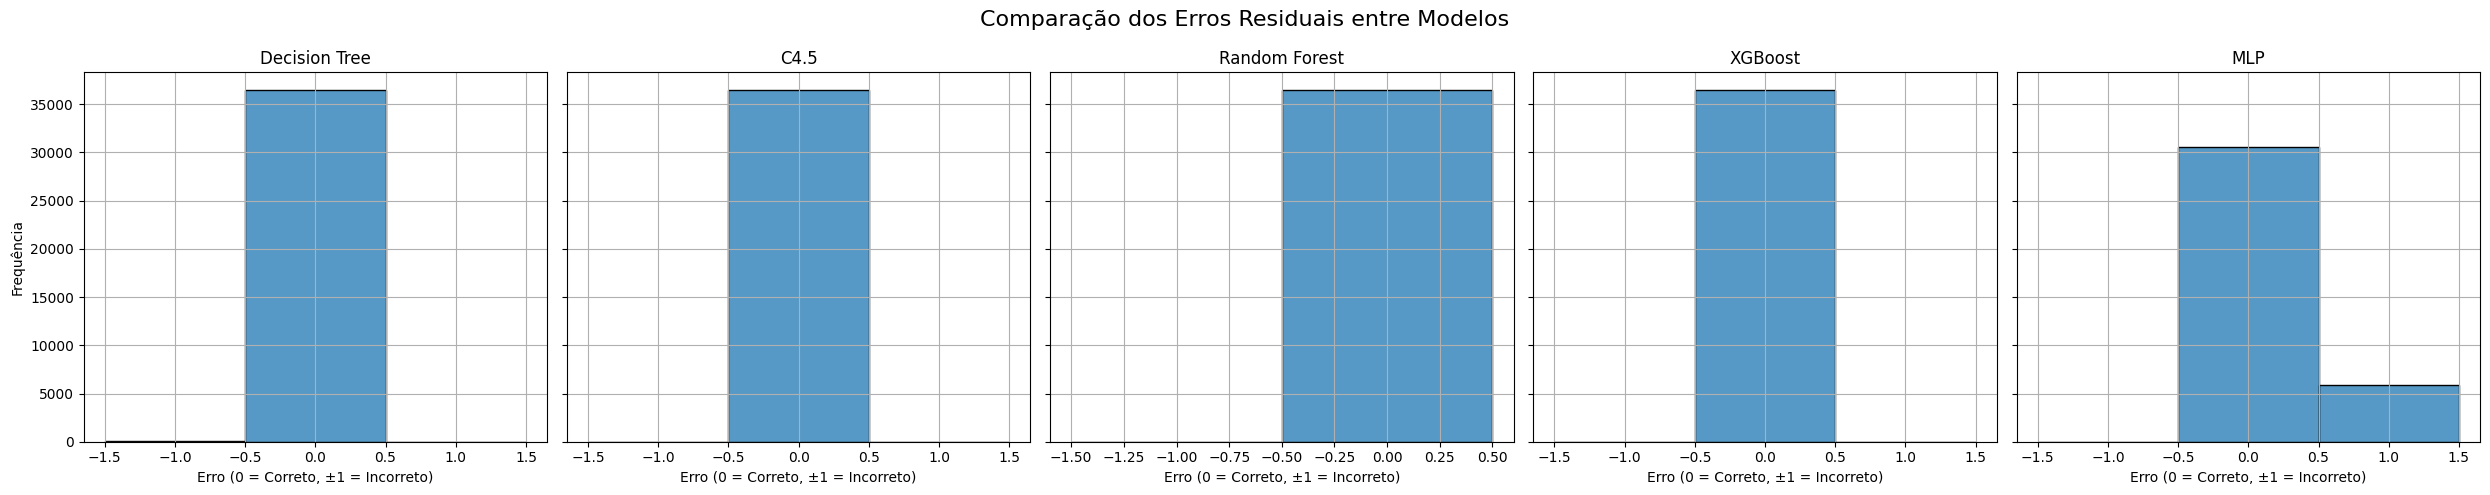

In [35]:
plot_residuals_comparativo(models, X_test, y_test)

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def comparar_erros_residuais(models, X_test, y_test):
    all_residuals = []
    all_names = []

    for name, model in models.items():
        y_pred = model.predict(X_test)
        residuals = y_test - y_pred  # Erro: 0 (correto), ±1 (incorreto)
        all_residuals.extend(residuals)
        all_names.extend([name] * len(residuals))

    df = pd.DataFrame({'Residuals': all_residuals, 'Model': all_names})

    plt.figure(figsize=(10, 6))
    ax = sns.histplot(
        data=df,
        x='Residuals',
        hue='Model',
        multiple='dodge',
        bins=3,
        discrete=True,
        shrink=0.8,
        edgecolor='black'
    )

    plt.title('Comparação dos Erros Residuais dos Modelos')
    plt.xlabel('Erro (0 = Correto, ±1 = Incorreto)')
    plt.ylabel('Frequência')
    plt.yscale("log")
    plt.grid(True)

    # Adicionar rótulos com valores nas barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)

    plt.tight_layout()
    plt.savefig('residuals_comparison_labeled.png')
    plt.show()


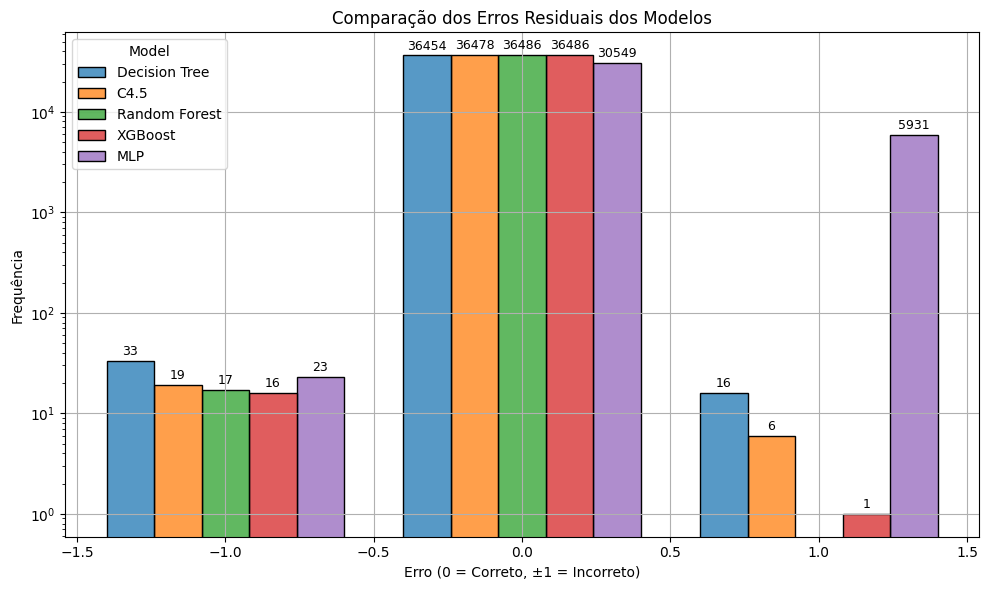

In [37]:
comparar_erros_residuais(models, X_test, y_test)

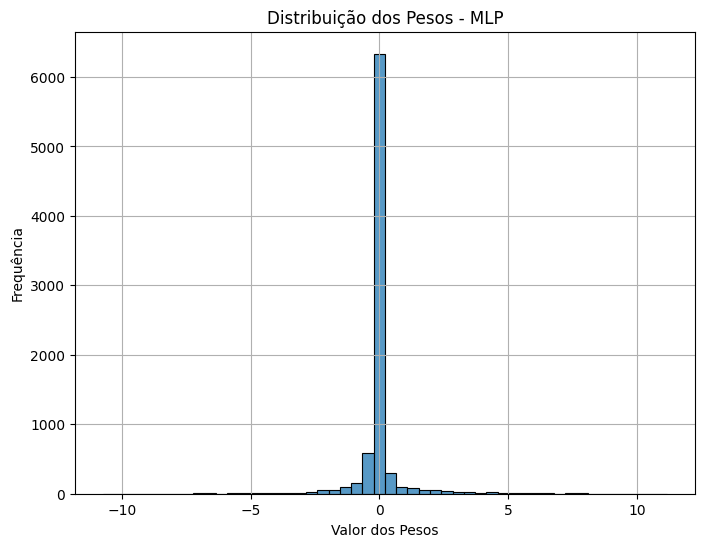

In [38]:
# c. Ajuste do Modelo (MLP - pesos, simplificado)
mlp = models['MLP']
mlp.fit(X_train, y_train)  # Retreinar para acessar pesos
weights = np.concatenate([layer.flatten() for layer in mlp.coefs_])
plt.figure(figsize=(8, 6))
sns.histplot(weights, bins=50)
plt.title('Distribuição dos Pesos - MLP')
plt.xlabel('Valor dos Pesos')
plt.ylabel('Frequência')
plt.grid()
plt.show()

In [39]:
from sklearn.metrics import roc_curve, auc

def plot_roc(model, name, X_test, y_test):
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'Curva ROC - {name}')
    plt.xlabel('Falso Positivo')
    plt.ylabel('Verdadeiro Positivo')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


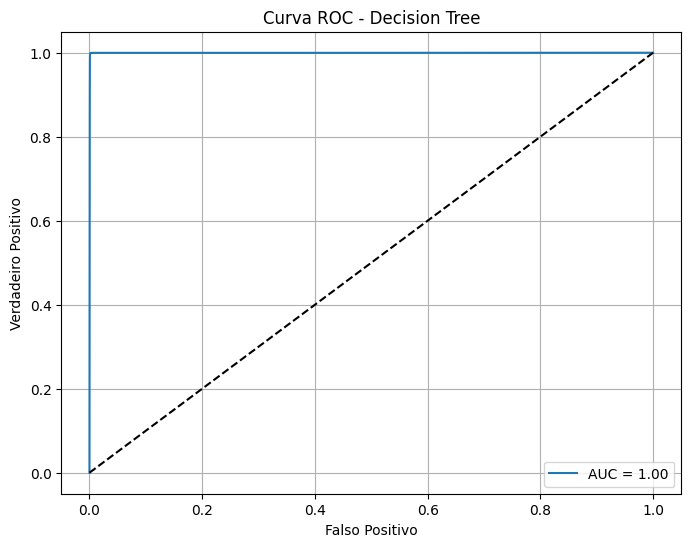

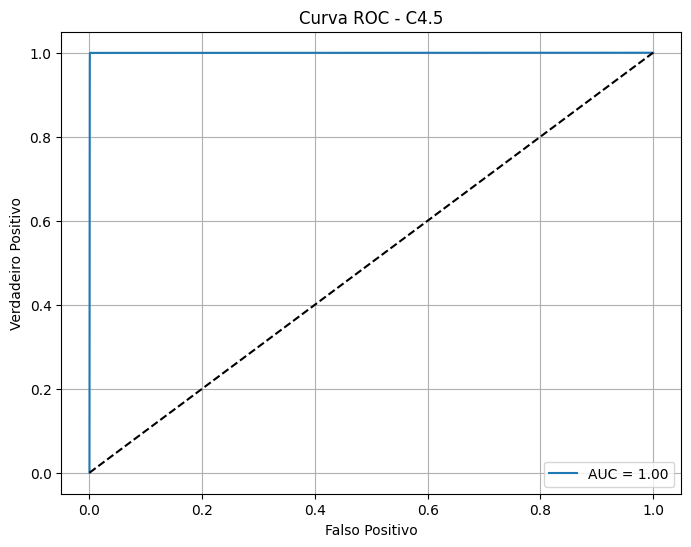

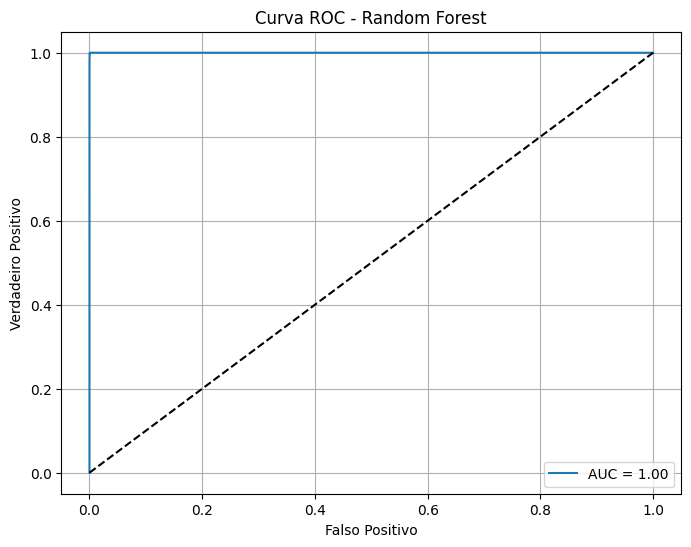

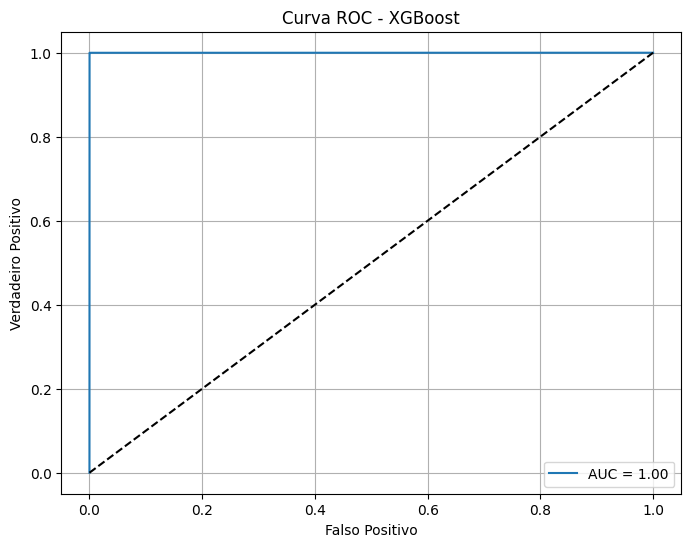

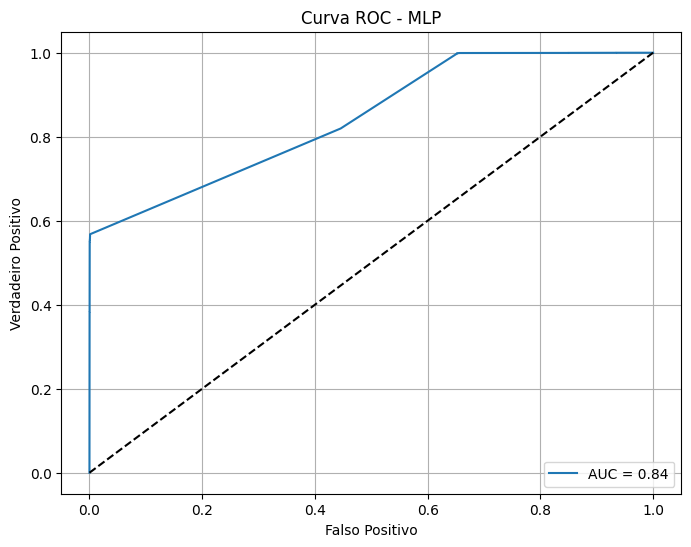

In [40]:
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        plot_roc(model, name, X_test, y_test)


In [41]:
import numpy as np
import shap
import pandas as pd
import matplotlib.pyplot as plt

def comparar_modelos_shap(models, X_sample, n_samples=100):
    # Amostrar dados para reduzir custo computacional
    X_sample = X_sample.sample(n=n_samples, random_state=42)
    
    # Dicionário para armazenar resultados
    results = {}
    
    for model_name, model in models.items():
        print(f"\n🔍 Calculando SHAP para {model_name}...")
        
        # Usar TreeExplainer para modelos baseados em árvores, KernelExplainer para MLP
        if model_name in ["Decision Tree", "C4.5", "Random Forest", "XGBoost"]:
            explainer = shap.Explainer(model, X_sample)
            shap_values = explainer(X_sample)
            # Verificar a forma de shap_values.values
            if len(shap_values.values.shape) == 3:  # (n_samples, n_features, n_classes)
                shap_vals = shap_values.values[:, :, 0]  # Focar na classe 0 (malicioso)
                expected_value = explainer.expected_value[0]
            else:  # (n_samples, n_features) - já é para a classe de interesse
                shap_vals = shap_values.values
                expected_value = explainer.expected_value if isinstance(explainer.expected_value, (int, float)) else explainer.expected_value[0]
        else:  # MLP
            explainer = shap.KernelExplainer(model.predict_proba, X_sample)
            shap_values = explainer.shap_values(X_sample)
            # shap_values para MLP é uma lista: [classe 0, classe 1]
            shap_vals = shap_values[0]  # Classe 0 (malicioso)
            expected_value = explainer.expected_value[0]
        
        # 1. Calcular complexidade: variância dos SHAP values por feature
        shap_variance = np.var(shap_vals, axis=0)  # Variância para cada feature
        avg_variance = np.mean(shap_variance)  # Variância média
        print(f"Variância média dos SHAP values: {avg_variance:.6f}")
        
        # 2. Contar features importantes (SHAP > threshold)
        threshold = 0.01  # Definir um threshold para "importância"
        mean_abs_shap = np.mean(np.abs(shap_vals), axis=0)
        important_features = np.sum(mean_abs_shap > threshold)
        print(f"Número de features com SHAP > {threshold}: {important_features}")
        
        # 4. Quantas features são responsáveis por 80% da importância?
        sorted_shap = np.sort(mean_abs_shap)[::-1]
        cumulative_importance = np.cumsum(sorted_shap) / np.sum(sorted_shap)
        num_features_80 = np.searchsorted(cumulative_importance, 0.8) + 1  # +1 pois começa em zero
        print(f"Nº de features que explicam 80% da importância: {num_features_80}")

        # 4. Gerar bar plot para visualização da importância média das features
        plt.figure(figsize=(12, 6))
        # Ordenar as features por importância média
        sorted_idx = np.argsort(mean_abs_shap)[::-1]  # Ordem decrescente
        sorted_features = X_sample.columns[sorted_idx]
        sorted_shap = mean_abs_shap[sorted_idx]
        # Plotar gráfico de barras
        plt.bar(sorted_features, sorted_shap, color='skyblue')
        plt.title(f"Importância Média das Features (SHAP) - {model_name} (Classe 0: Malicioso)")
        plt.xlabel("Features")
        plt.ylabel("Média Absoluta dos SHAP Values")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        model_filename = model_name.lower().replace(" ", "_")
        save_path = os.path.join(save_dir, f"shap_bar_plot_{model_filename}.png")
        plt.savefig(save_path)
        plt.show()
        # Armazenar resultados
        results[model_name] = {
            "variance": avg_variance,
            "n_important_features": important_features,
            "mean_abs_shap": mean_abs_shap,
            "shap_vals": shap_vals
        }
    
    # Comparação final
    print("\n📊 Comparação Final dos Modelos:")
    comparison_df = pd.DataFrame({
        "Modelo": list(models.keys()),
        "Variância Média SHAP": [results[m]["variance"] for m in models.keys()],
        "Nº de Features Importantes": [results[m]["n_important_features"] for m in models.keys()]
    })
    print(comparison_df)
    
    return results


🔍 Calculando SHAP para Decision Tree...
Variância média dos SHAP values: 0.002932
Número de features com SHAP > 0.01: 13
Nº de features que explicam 80% da importância: 8


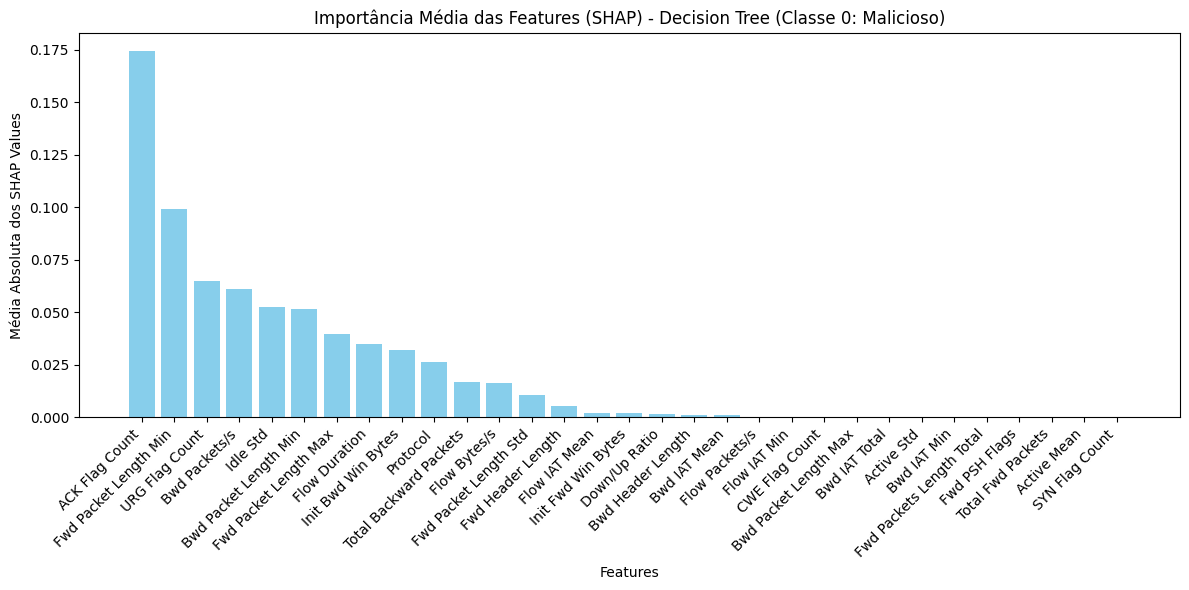


🔍 Calculando SHAP para C4.5...
Variância média dos SHAP values: 0.003209
Número de features com SHAP > 0.01: 12
Nº de features que explicam 80% da importância: 8


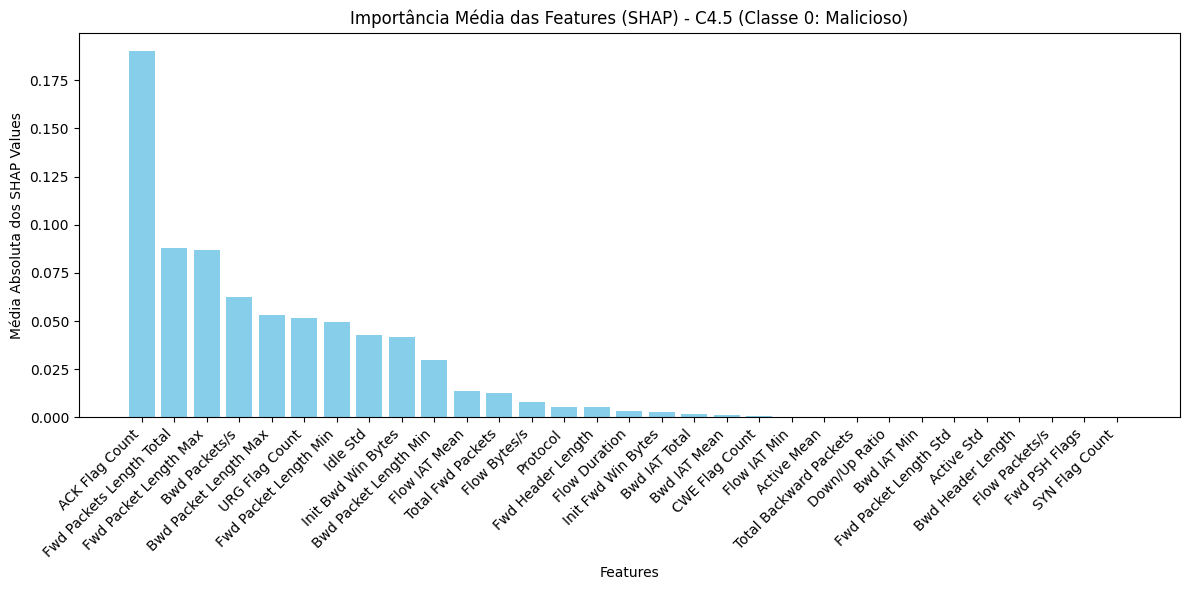


🔍 Calculando SHAP para Random Forest...
Variância média dos SHAP values: 0.000923
Número de features com SHAP > 0.01: 15
Nº de features que explicam 80% da importância: 12


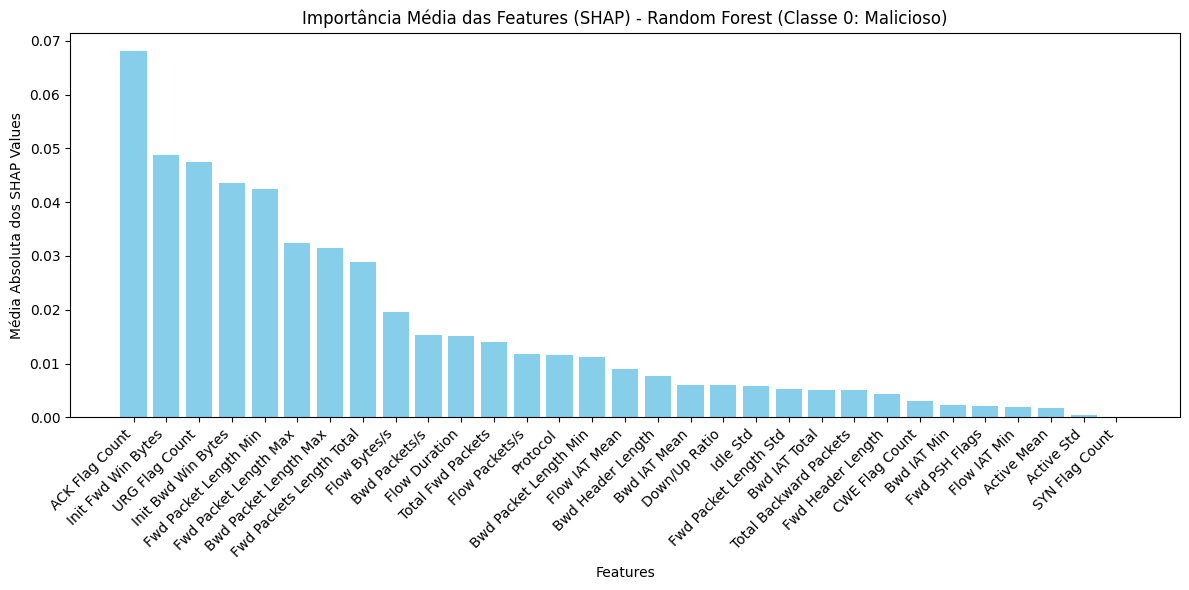


🔍 Calculando SHAP para XGBoost...
Variância média dos SHAP values: 1.047607
Número de features com SHAP > 0.01: 27
Nº de features que explicam 80% da importância: 10


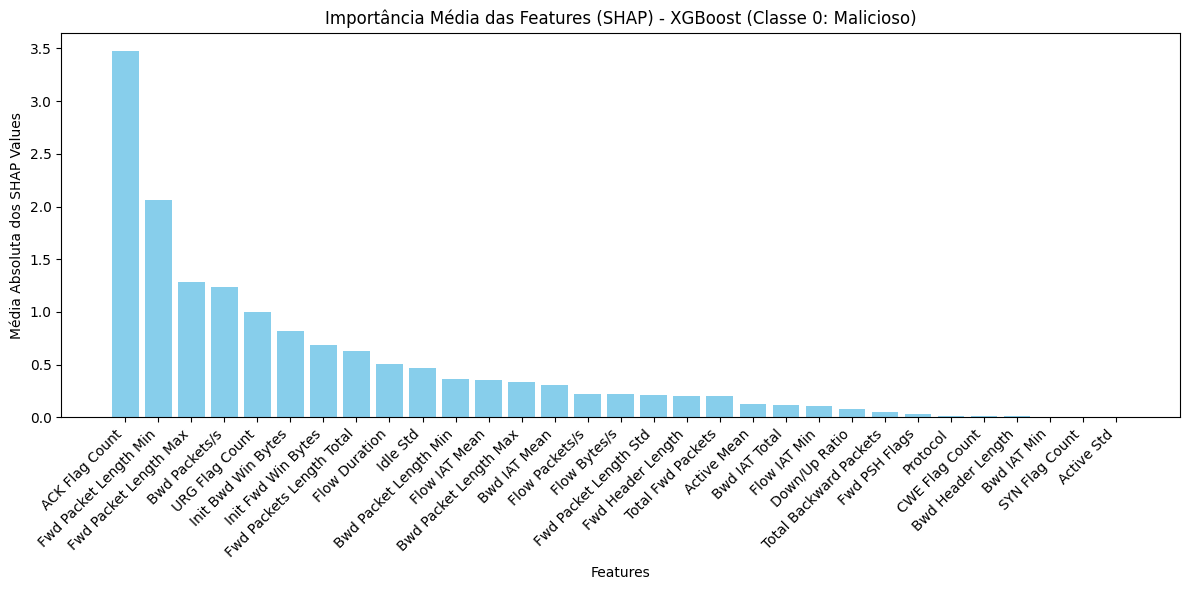


🔍 Calculando SHAP para MLP...


  0%|          | 0/100 [00:00<?, ?it/s]

Variância média dos SHAP values: 0.002779
Número de features com SHAP > 0.01: 12
Nº de features que explicam 80% da importância: 9


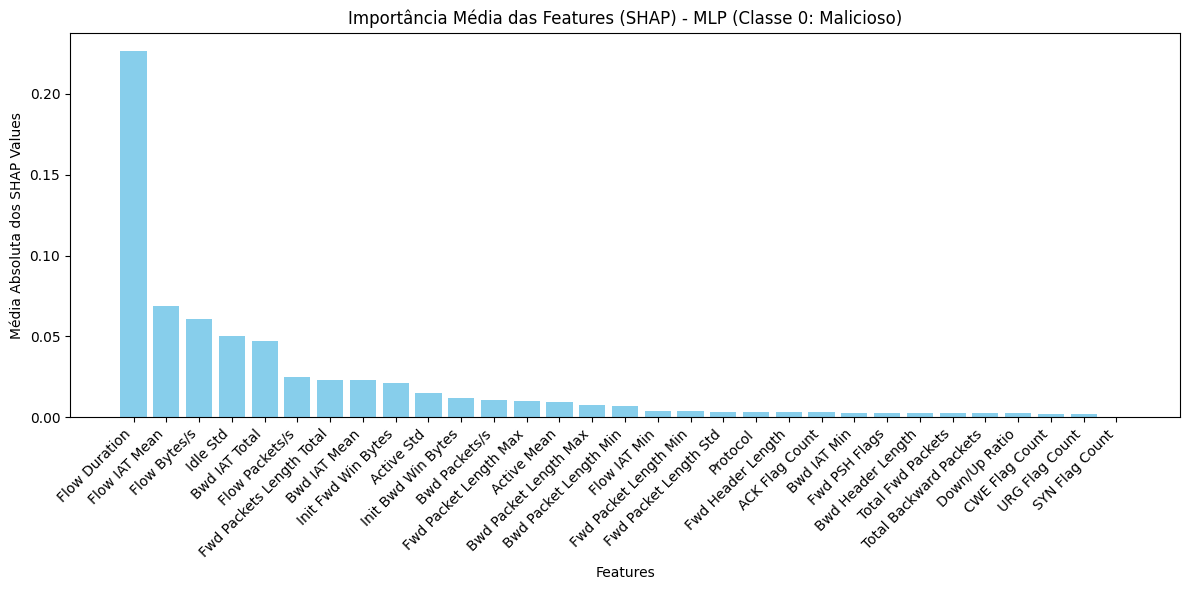


📊 Comparação Final dos Modelos:
          Modelo  Variância Média SHAP  Nº de Features Importantes
0  Decision Tree              0.002932                          13
1           C4.5              0.003209                          12
2  Random Forest              0.000923                          15
3        XGBoost              1.047607                          27
4            MLP              0.002779                          12


{'Decision Tree': {'variance': 0.0029319207410093908,
  'n_important_features': 13,
  'mean_abs_shap': array([0.02625   , 0.03476167, 0.        , 0.01699736, 0.        ,
         0.03971103, 0.09937871, 0.0108    , 0.        , 0.05140944,
         0.01631519, 0.        , 0.00229267, 0.        , 0.        ,
         0.00094   , 0.        , 0.        , 0.0053    , 0.00115891,
         0.06124317, 0.        , 0.17434598, 0.06495052, 0.        ,
         0.00147685, 0.00211196, 0.03225855, 0.        , 0.        ,
         0.05246078]),
  'shap_vals': array([[ 0.045     ,  0.01904713,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.045     ,  0.01904713,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.02339716,  0.        , ...,  0.        ,
           0.        ,  0.07155941],
         ...,
         [-0.04916667,  0.00966667,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [-0.023333

In [42]:
comparar_modelos_shap(models, X_train, n_samples=100)